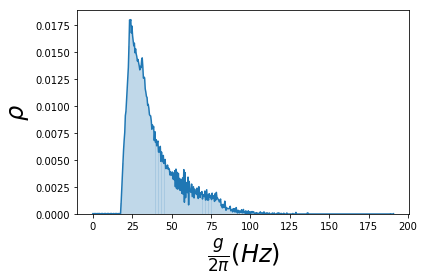

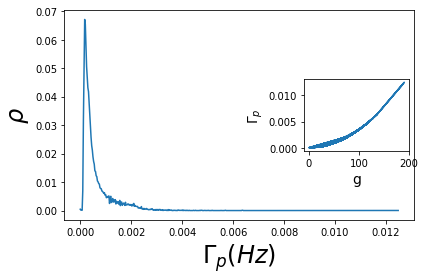

In [1]:
#!/usr/bin/env python
from scipy import constants as sp
import os
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from process_data import ReadComsol,PostProcData
import Plotting
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Read data from downloads
file_dbx = os.getcwd() + '/data_postprocess/downloads/exports/Bx_fullData.csv'
file_dby = os.getcwd() + '/data_postprocess/downloads/exports/By_fullData.csv'

rdx = ReadComsol.ReadComsol(file_dbx)
rdy = ReadComsol.ReadComsol(file_dby)

# Read csv file, and get x,y annd dbx/dby data for each
# blocked point in space
bx_x,bx_y,bx_z = rdx.read_full_data()
by_x,by_y,by_z = rdy.read_full_data()
#xax = np.linspace(float(bx_x[0]),float(bx_x[len(bx_x)-1]),len(bx_x))
dbx = np.asarray(bx_z).astype(np.float)
dby = np.asarray(by_z).astype(np.float)

# Postprocess data
post = PostProcData.PostProcData()

# Single spin coupling for each point on mesh grid
g = post.coupling(dbx,dby,theta=0)
hist, edges = post.spin_density(bx_x,bx_y,g) # density

# Calculate Purcell enhancement at each grid point
Q = 10000 # Q factor - for now typed in, but will be found from CST calcs ultimately
purcell = post.purcell_rate(g,Q)
pdens, pedge = post.purcell_density(bx_x,bx_y,purcell) # density

fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.bar(edges,height=hist,alpha=0.15)
ax1.plot(edges,hist)
ax1.set_xlabel('$\\frac{g}{2 \pi} (Hz)$',fontsize='24')
ax1.set_ylabel('$\\rho$',fontsize='24')
plt.tight_layout()
#plt.savefig(str(os.getcwd() + '/figs/' + 'spin_density.pdf'))
plt.show()

fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.plot(pedge,pdens)
ax2.set_xlabel('$\Gamma_{p} (Hz)$',fontsize='24')
ax2.set_ylabel('$\\rho$',fontsize='24')
plt.tight_layout()

inset_axes = inset_axes(ax2,
    width="30%",
    height=1.,
    loc=7)
plt.plot(g,purcell)
plt.xlabel('g',fontsize=14)
plt.ylabel('$\Gamma_{p}$',fontsize=14)
#plt.savefig(str(os.getcwd() + '/figs/' + 'purcell_density.eps'))
plt.show()

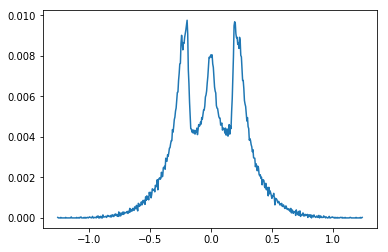

In [14]:
B1 = dbx + dby
gamma = 4.32e07
omega_larmor = gamma * B1
tau = 1
theta_larmor = omega_larmor * tau
lardens, laredge = post.larmor_density(bx_x,bx_y,theta_larmor)



## Calculate total B1 field
#theta = 0
#B1 = post.B1(dbx, dby, theta)

## Calculate Larmor frequency
#gamma = 4.32e07 # Bismuth gyromagnetic ratio (rad/T*s)
#omega_larmor = post.larmor_omega(B1,gamma)
#tau = 1e-03
#theta_larmor = post.larmor_theta(omega_larmor, tau)

#lardens, laredge = post.larmor_density(bx_x,bx_y,theta_larmor)

fig0, ax0 = plt.subplots(figsize=(6,4))
ax0.plot(laredge, lardens)
plt.show()

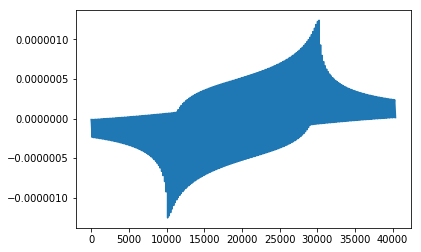

In [10]:
plt.plot(theta_larmor)
plt.show()